In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('./app/data/cleaned_data.csv')

In [6]:
len(df)

10000

Text(0.5,0,u'Zipcode of Incident')

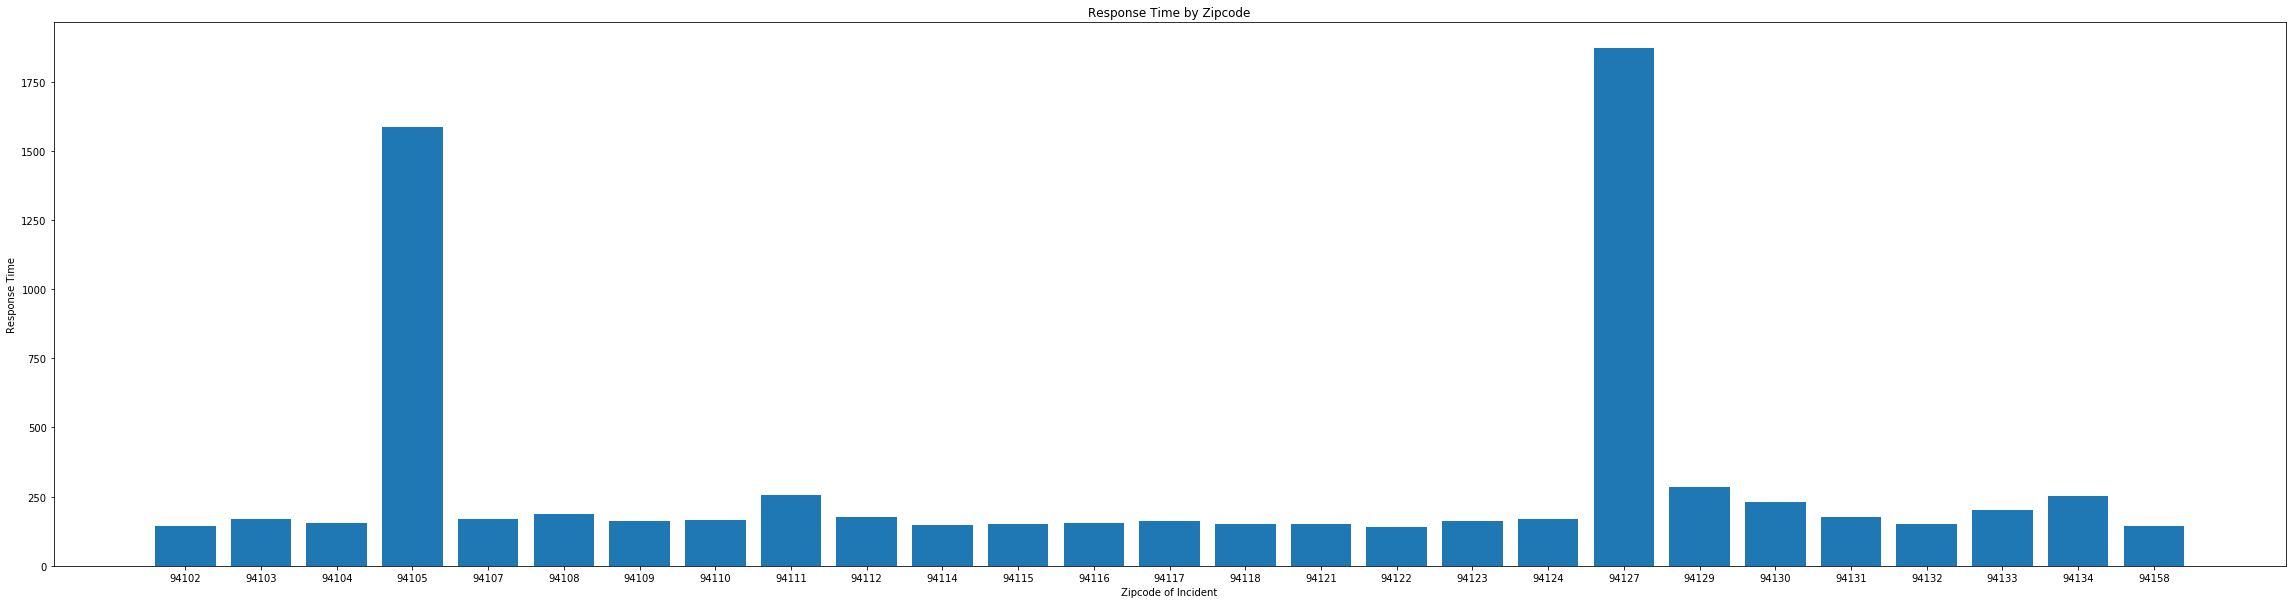

In [18]:
plt.figure(figsize=(40, 10))
by_zipcode = df.groupby(['zipcode_of_incident'])
y_pos = np.arange(len(by_zipcode))
zipcode_response_times = by_zipcode['response_time'].mean()
plt.title('Response Time by Zipcode')
fig = plt.bar(y_pos, zipcode_response_times, align='center')
plt.xticks(y_pos, by_zipcode.groups.keys())
plt.ylabel('Response Time')
plt.xlabel('Zipcode of Incident')

In [3]:
def parse_time(time):
    '''
    Parses time string, returns a datetime object
    '''
    f = "%Y-%m-%d %H:%M:%S.%f"
    return datetime.strptime(time[:-4], f)

In [12]:
def response_time(x):
    '''
    Takes in row in the dataframe, returns response time in seconds.
    '''
    return (parse_time(x.dispatch_timestamp)-parse_time(x.received_timestamp)).total_seconds()

In [20]:
def to_seconds(x):
    x = parse_time(x)
    return x.hour*3600 + x.minute*60 + x.second

In [22]:
df['received_time_seconds'] = df.apply(lambda x: to_seconds(x.received_timestamp), axis=1)

In [6]:
days = df.apply(lambda x: parse_time(x.dispatch_timestamp).day, axis=1)

In [8]:
np.max(days)

25

In [9]:
np.min(days)

13

In [23]:
df.to_csv('./app/data/cleaned_data.csv')

In [8]:
ct = df.groupby(['call_type'])
ct.groups.keys()

['Structure Fire',
 'Vehicle Fire',
 'HazMat',
 'Fuel Spill',
 'Outside Fire',
 'Elevator / Escalator Rescue',
 'Citizen Assist / Service Call',
 'Medical Incident',
 'Water Rescue',
 'Electrical Hazard',
 'Other',
 'Alarms',
 'Smoke Investigation (Outside)',
 'Train / Rail Incident',
 'Gas Leak (Natural and LP Gases)',
 'Odor (Strange / Unknown)',
 'Traffic Collision']

In [121]:
by_zipcode = df.groupby(['zipcode_of_incident'])
y_pos = np.arange(len(by_zipcode))
zipcode_response_times = by_zipcode['response_time'].mean()

Text(0.5,0,u'Zipcode of Incident')

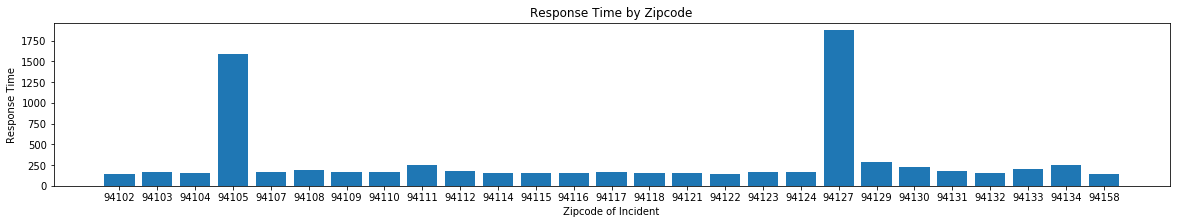

In [123]:
plt.figure(figsize=(20, 3))
plt.title('Response Time by Zipcode')
plt.bar(y_pos, zipcode_response_times, align='center')
plt.xticks(y_pos, by_zipcode.groups.keys())
plt.ylabel('Response Time')
plt.xlabel('Zipcode of Incident')

In [124]:
by_call_type = df.groupby(['call_type'])
by_call_type.groups.keys()

['Structure Fire',
 'Vehicle Fire',
 'HazMat',
 'Fuel Spill',
 'Outside Fire',
 'Elevator / Escalator Rescue',
 'Citizen Assist / Service Call',
 'Medical Incident',
 'Water Rescue',
 'Electrical Hazard',
 'Other',
 'Alarms',
 'Smoke Investigation (Outside)',
 'Train / Rail Incident',
 'Gas Leak (Natural and LP Gases)',
 'Odor (Strange / Unknown)',
 'Traffic Collision']